# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

In [5]:
import scipy as sp
import scipy.special as sps

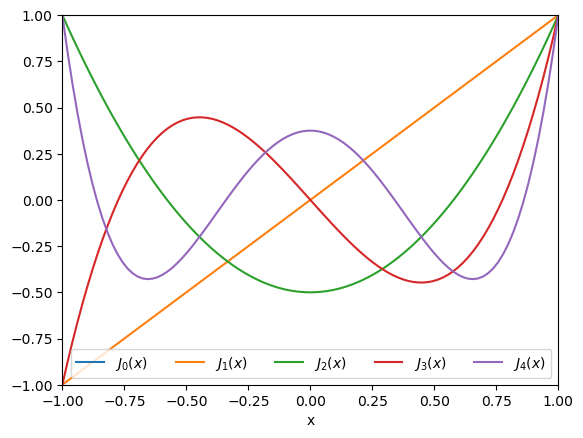

In [246]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)

fig, ax = plt.subplots()

for n in range(5):
    
    ax.plot(x, sps.eval_legendre(n,x), label=f"$J_{n}(x)$")
    ax.legend(loc="lower right", ncol=5)
    ax.set_xlabel("x")
    ax.set_ylim(-1, 1)
    ax.set_xlim(-1, 1)




2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
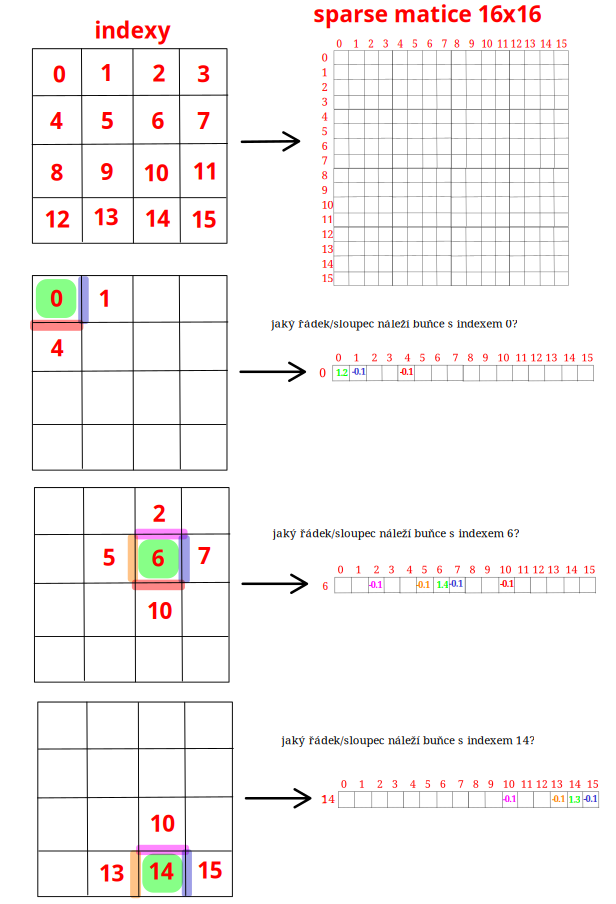


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [192]:
import scipy.sparse as sparse
n = 3

epsilon = 1e-1
k=-1
A = sparse.lil_matrix((n*n, n*n))

for i in range(n):
    for j in range(n):
        k+=1
        if i==0 and j==0:
            A[k,k] = 1 + epsilon*2
            A[k,k+1] = - epsilon
            A[k,k+n] = - epsilon
        elif i==0 and j!=n-1 and j!=0:
            A[k,k] = 1 + epsilon*3
            A[k,k+1] = - epsilon
            A[k,k+n] = - epsilon
            A[k,k-1] = - epsilon
        elif i==0 and j==n-1:
            A[k,k] = 1 + epsilon*2
            A[k,k+n] = - epsilon
            A[k,k-1] = - epsilon
        elif i!=0 and i!=n-1 and j==0:
            A[k,k] = 1 + epsilon*3
            A[k,k+1] = - epsilon
            A[k,k+n] = - epsilon
            A[k,k-n] = - epsilon
        elif i!=0 and i!=n-1 and j!=0 and j!=n-1:
            A[k,k] = 1 + epsilon*4
            A[k,k+1] = - epsilon
            A[k,k-1] = - epsilon
            A[k,k+n] = - epsilon
            A[k,k-n] = - epsilon
        elif i!=0 and i!=n-1 and j==n-1:
            A[k,k] = 1 + epsilon*3
            A[k,k-1] = - epsilon
            A[k,k+n] = - epsilon
            A[k,k-n] = - epsilon
        elif i==n-1 and j==0:
            A[k,k] = 1 + epsilon*2
            A[k,k+1] = - epsilon
            A[k,k-n] = - epsilon
        elif i==n-1 and j!=0 and j!=n-1:
            A[k,k] = 1 + epsilon*3
            A[k,k+1] = - epsilon
            A[k,k-1] = - epsilon
            A[k,k-n] = - epsilon
        elif i==n-1 and j==n-1:
            A[k,k] = 1 + epsilon*2
            A[k,k-1] = - epsilon
            A[k,k-n] = - epsilon
     

        
    
        
        # TODO fill matrix A - diagonal and non-diagonal elements

print(A.todense())


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [231]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n,n*n)# TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = np.arange(0,n*n-n)# TODO - vytvořte indexy buněk pod hranou
    row_horizontal = np.hstack((horizontal_up_idx,horizontal_low_idx))# TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = np.hstack((horizontal_low_idx,horizontal_up_idx))# TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = np.delete(np.arange(n*n),index_matrix_vertical[:n]) # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = np.delete(np.arange(n*n-1),(index_matrix_vertical[1:n]-1)) # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = np.hstack((vertical_right_idx,vertical_left_idx))# TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = np.hstack((vertical_left_idx,vertical_right_idx))# TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    data_diag[0:n] = data_diag[0:n] -epsilon
    data_diag[n*n-n:n*n] = data_diag[n*n-n:n*n] -epsilon
    data_diag[0:n*n:n] = data_diag[0:n*n:n] -epsilon
    data_diag[n-1:n*n:n] = data_diag[n-1:n*n:n] -epsilon
    


    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))


    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)), shape=(n*n, n*n)).toarray()# TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon))


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

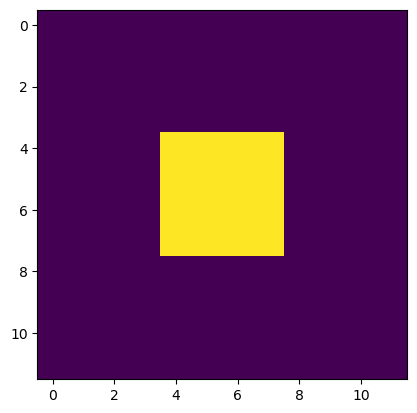

In [284]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)


b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

c:\Users\maink\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


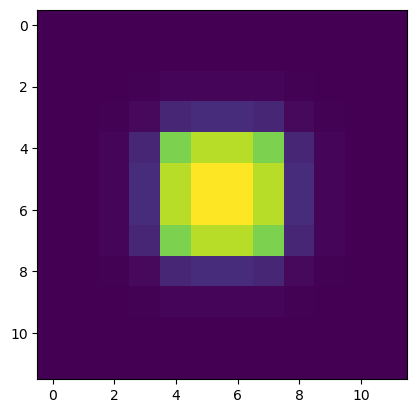

In [233]:
import scipy as sp
from scipy.sparse import csr_matrix, lil_matrix, csc_matrix

x = sp.sparse.linalg.spsolve(A, b)
x = x.flatten()
plt.imshow(x.reshape((n, n)))

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek


[[-0.00635406  0.00479893 -0.00283951]
 [ 0.0184738  -0.01295556  0.00832504]
 [-0.02891014  0.01718528 -0.01324322]
 [ 0.03679649 -0.01608564  0.0172589 ]
 [-0.04159542  0.00973158 -0.02009841]
 [ 0.04313525  0.00032969  0.02156825]
 [-0.04158012 -0.01148268 -0.02156825]
 [ 0.03734673  0.02073896  0.02009841]
 [-0.03099267 -0.02553789 -0.0172589 ]
 [ 0.02310632  0.02443824  0.01324322]
 [-0.01422511 -0.01751497 -0.00832504]
 [ 0.00479893  0.00635406  0.00283951]
 [ 0.01751497 -0.01422511  0.00832504]
 [-0.05089581  0.03843928 -0.02440777]
 [ 0.07956377 -0.05110926  0.03882715]
 [-0.10110969  0.04810499 -0.05060053]
 [ 0.11406525 -0.02963119  0.05892557]
 [-0.11800305  0.00021346 -0.06323492]
 [ 0.11344364  0.03248545  0.06323492]
 [-0.10160873 -0.0597039  -0.05892557]
 [ 0.08409376  0.07392901  0.05060053]
 [-0.06254784 -0.07092473 -0.03882715]
 [ 0.03843928  0.05089581  0.02440777]
 [-0.01295556 -0.0184738  -0.00832504]
 [-0.02443824  0.02310632 -0.01324322]
 [ 0.07092473 -0.06254784

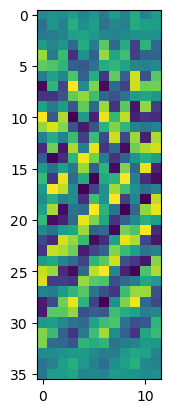

In [245]:
n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

w, v = sp.sparse.linalg.eigsh(A, k=3)
print(v)
v = v.flatten()
plt.imshow(v.reshape((3*n,n)))

# TODO - spočtěte a vykreslete vlastní vektory matice A

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [273]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np

f=lambda x:(1/8)*(63*(x**5)-70*(x**3)+15*x)

a, b = -1, 1 # budeme hledat kořeny na intervalu <a, b>
resolution = 1000
print(f)
# Identify the subintervals where the function changes sign
x_vals = np.linspace(a, b, resolution)
print(f)
sign_changes = []

# projdeme všechny body na intervalu a zjistíme, kde se znaménko funkce mění
for i in range(len(x_vals) - 1):
    if np.sign(f(x_vals[i])) != np.sign(f(x_vals[i + 1])):
        sign_changes.append((x_vals[i], x_vals[i + 1]))

# pro všechny dvojice, kde se znaménko mění, použijeme root_scalar()
roots = []
for interval in sign_changes:
    result = opt.root_scalar(f, bracket=interval)
    roots.append(result.root)

roots = np.array(roots)

print(f"Kořeny jsou v bodech {roots} a mají hodnoty {f(roots)}.")

<function <lambda> at 0x0000018684581EE0>
<function <lambda> at 0x0000018684581EE0>
Kořeny jsou v bodech [-0.90617985 -0.53846931  0.          0.53846931  0.90617985] a mají hodnoty [ 3.77475828e-15 -2.22044605e-16  0.00000000e+00  2.22044605e-16
 -3.99680289e-15].


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [281]:
import sympy as sp
import numpy as np
from scipy.special import roots_legendre, eval_legendre
sp.roots(legendre_5)

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5
print(sp.nroots(legendre_5))


[-0.906179845938664, -0.538469310105683, 0, 0.538469310105683, 0.906179845938664]


In [283]:
porov = np.zeros(5)

for i in range(5):
    porov[i]=roots[i]-sp.nroots(legendre_5)[i]
    
print(porov)




[0. 0. 0. 0. 0.]
